# Fuzzy Reconstruction with Entropy

Require:  
The set of points $\left\{p_1, p_2, ..., p_n \right\}$;
The reconstruction point $x$;  
Setting the weight decay parameter $\alpha$;  
Setting the sum of absolute error $\delta$;


In [227]:
%matplotlib inline

import matplotlib
from sklearn import datasets
from sklearn import metrics
from sklearn import preprocessing
from scipy import optimize
import numpy as np
import  matplotlib.pyplot as plt 
import matplotlib.colors as colors
import time
colors_ = np.array(colors.cnames.keys())

matplotlib.rcParams['figure.figsize'] = (26, 26)
samples = 5
np.random.seed(5)
# P = np.random.random_sample([1,samples])
P = np.array([[0.1],[0.3],[0.5],[0.7],[0.9]]).T

x = np.random.random_sample([1,1])

alpha = 0.3
delta = 1e-5

def res(x,alpha,samples,P):
    i=0
    W0=np.zeros([samples,1000])
    W0[:,0]=np.random.random_sample([samples])
    residual = []
    if alpha==0:
        W0[:,0] = np.matrix(P).I*x
    else:
        while True:
            i+=1
            W = W0[:,i-1]
            W0[:,i] = np.exp((2*np.dot(x.T,P)-np.dot(np.dot(P.T,P)+np.dot(P.T,P).T, W0[:,i-1]))/alpha)/ \
               sum(sum(np.exp((2*np.dot(x.T,P)-np.dot(np.dot(P.T,P)+np.dot(P.T,P).T, W0[:,i-1]))/alpha)))
    #         print np.exp(-alpha+2*np.dot(x.T,P)-np.dot(np.dot(P.T,P)+np.dot(P.T,P).T, W0[:,i-1])/alpha)
    #         print (sum(W0[:,i]))
            if i==999:
                break
            W1 = W0[:,i]

            residual.append(np.abs((np.dot(W.T*np.log(W.T),W*np.log(W))+np.dot(x - W.T*P,(x - W.T*P).T))[0,0]-\
                           (np.dot(W1.T*np.log(W1.T),W1*np.log(W1))+np.dot(x - W1.T*P,(x - W1.T*P).T))[0,0]))
    #         print residual[-1],np.dot(W.T*np.log(W.T),W*np.log(W))+np.dot(x - W.T*P,(x - W.T*P).T)[0,0],\
    #             np.dot(W1.T*np.log(W1.T),W1*np.log(W1))+np.dot(x - W1.T*P,(x - W1.T*P).T)[0,0]
            if residual[-1]<delta:
                break
    return [0, 
            np.dot(W0[:,i].T*np.log(W0[:,i].T),W0[:,i]*np.log(W0[:,i])), 
            np.dot(x - W0[:,i].T*P,(x - W0[:,i].T*P).T),
            W0[:,0:i+1],
            residual]



In [228]:
x_samples = 100
X = np.linspace(0,1,x_samples)
# res(tem,W,alpha,samples)
result=[res(tem,alpha,samples,P) for tem in X]
r = np.array([temp[0:3] for temp in result])
W0 = [temp[3] for temp in result]
residual_error = np.array([temp[4] for temp in result])

In [229]:
W1 = np.array([temp[3][:,-1] for temp in result])
argW = W1.argsort()
W1.sort(1)

U = np.zeros(W1.shape)
a,b = W1.shape
# print a,b
for i in range(0,a):
    for j in range(0,b):
        U[i,j] = W1[i,4-j]*(j+1)+sum(W1[i,4-j::-1])-W1[i,4-j]
u = np.zeros(W1.shape)
for i in range(0,a):
    for j in range(0,b):
        u[i,j] = U[i,4-argW[i,j]]

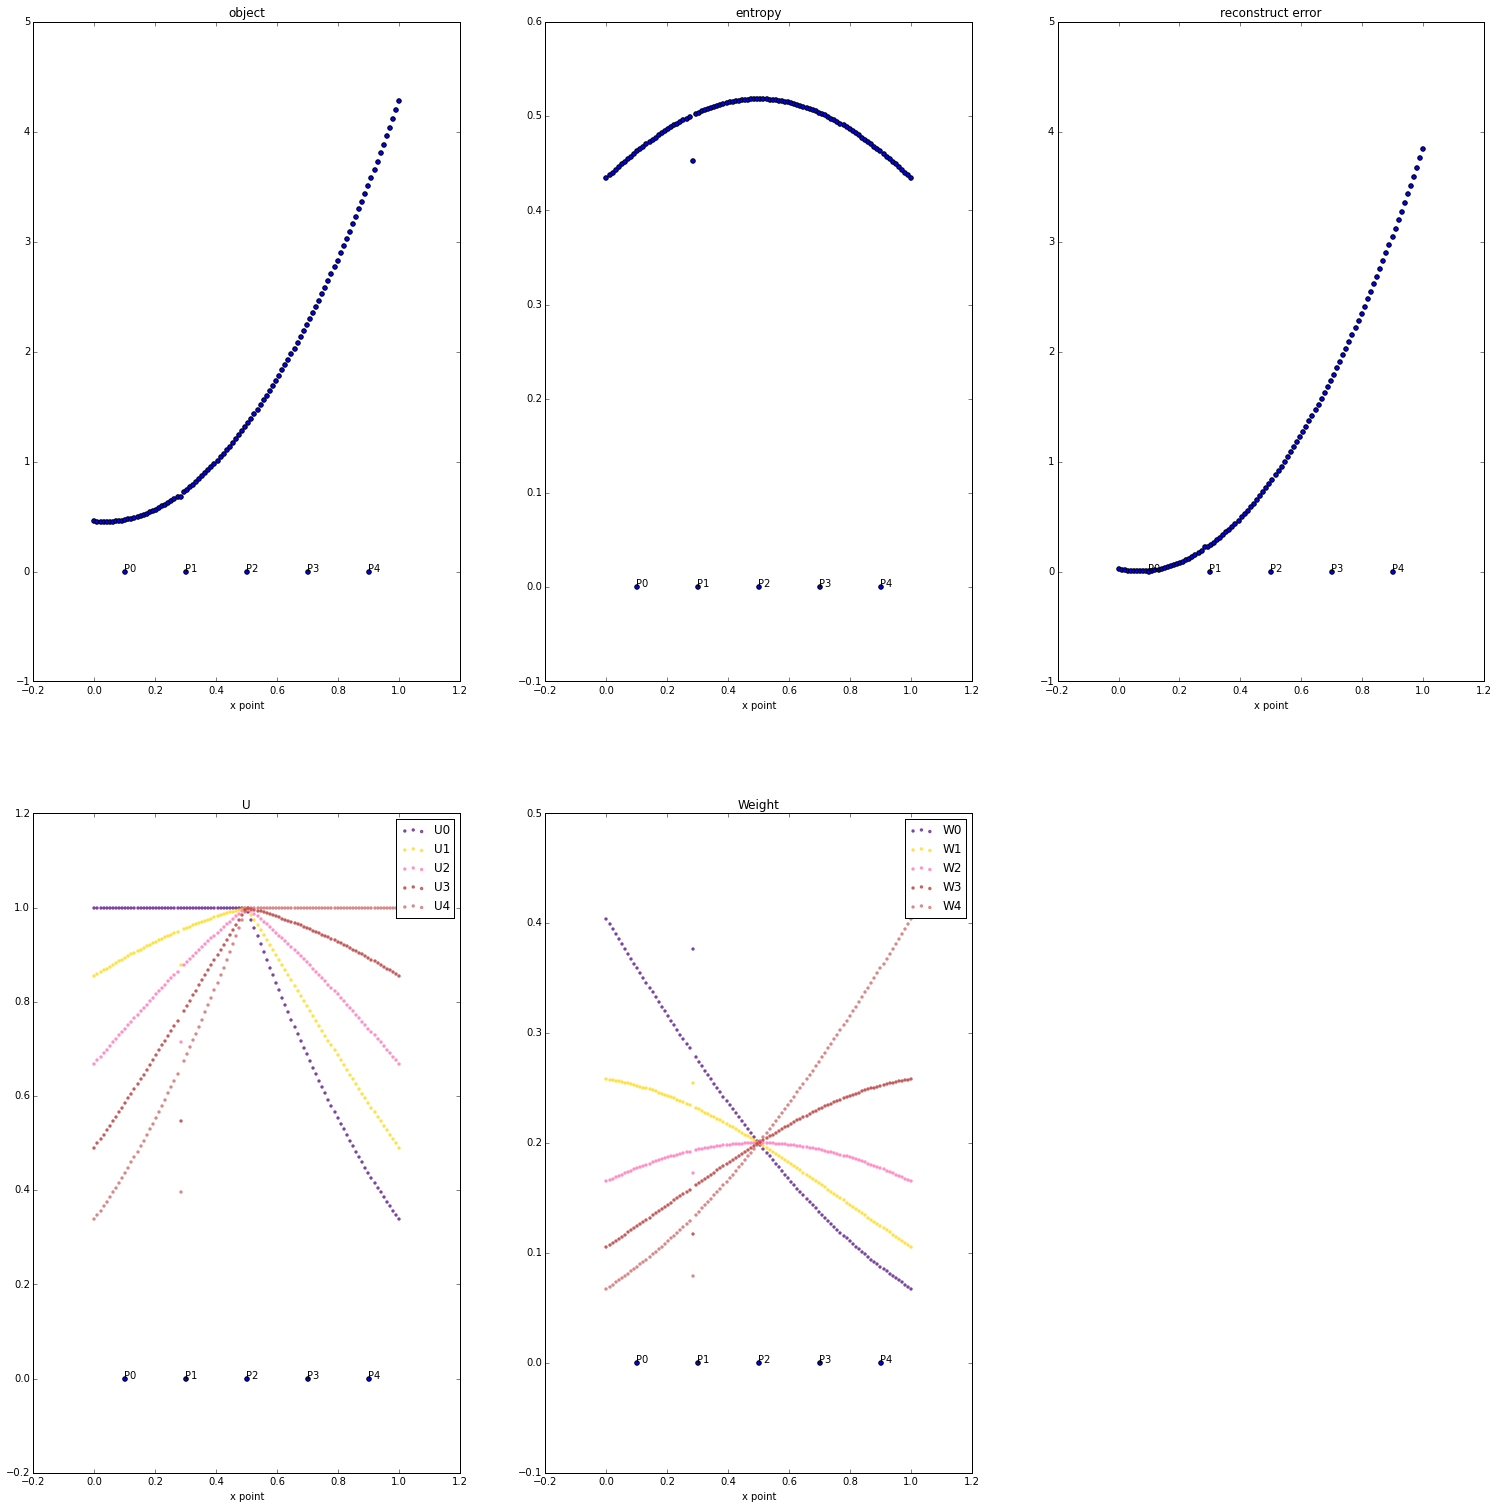

In [230]:
plt.subplot(231)
plt.scatter(X, r[:,2]+r[:,1])
plt.scatter(P,np.zeros(samples),s=20)
for i in range(0,samples):
    plt.text(P[0,i],-0.00, 'P%d'%i ) 
plt.xlabel('x point')
plt.title(u"object")
plt.subplot(232)
plt.scatter(X, r[:,1])
plt.scatter(P,np.zeros(samples),s=20)
for i in range(0,samples):
    plt.text(P[0,i],-0.00, 'P%d'%i ) 
plt.title(u"entropy")
plt.xlabel('x point')
plt.subplot(233)
plt.scatter(X, r[:,2])
plt.scatter(P,np.zeros(samples),s=20)
for i in range(0,samples):
    plt.text(P[0,i],-0.00, 'P%d'%i ) 
plt.xlabel('x point')
plt.title(u"reconstruct error")
plt.subplot(234)
s = []
for i in range(0,samples):
    s.append(plt.scatter(X, [u[temp][i] for temp in range(0,len(W0))],color=colors_[i],alpha=0.6,s=6))

plt.scatter(P,np.zeros(samples),s=20)
for i in range(0,samples):
    plt.text(P[0,i],-0.00, 'P%d'%i )    
plt.legend(s, ('U%d'%temp for temp in range(0,samples)), 'best', numpoints=1)# make legend
plt.xlabel('x point')
plt.title(u"U")

plt.subplot(235)
s = []
for i in range(0,samples):
    s.append(plt.scatter(X, [W0[temp][i,-1] for temp in range(0,len(W0))],color=colors_[i],alpha=0.6,s=6))

plt.scatter(P,np.zeros(samples),s=20)
for i in range(0,samples):
    plt.text(P[0,i],-0.00, 'P%d'%i )    
plt.legend(s, ('W%d'%temp for temp in range(0,samples)), 'best', numpoints=1)# make legend
plt.xlabel('x point')
plt.title(u"Weight")

# idx = 10
# plt.subplot(235)
# for i in range(0,samples):
#     s.append(plt.scatter(range(0,len(W0[idx][i,:])), W0[idx][i,:], color=colors_[i]))

# plt.legend(s, ('W%d'%temp for temp in range(0,samples)), 'best', numpoints=1)# make legend
# plt.xlabel('iteration times')
# plt.title(u"residual error, x="+str(X[idx]))


# plt.subplot(236)
# idx = 99
# for i in range(0,samples):
#     s.append(plt.scatter(range(0,len(W0[idx][i,:])), W0[idx][i,:], color=colors_[i]))
# plt.legend(s, ('W%d'%temp for temp in range(0,samples)), 'best', numpoints=1)# make legend
# plt.xlabel('iteration times')
# plt.title(u"residual error, x="+str(X[idx]))

plt.show()

In [83]:
x_samples = 100
P0 = np.linspace(0,1,x_samples)
# res(tem,W,alpha,samples)
result=[]
for tem in P0:
    P[0,0]=tem
    result.append(res(np.array([[0.55]]),alpha,samples,P))
r = np.array([temp[0:3] for temp in result])
W0 = [temp[3] for temp in result]
residual_error = np.array([temp[4] for temp in result])

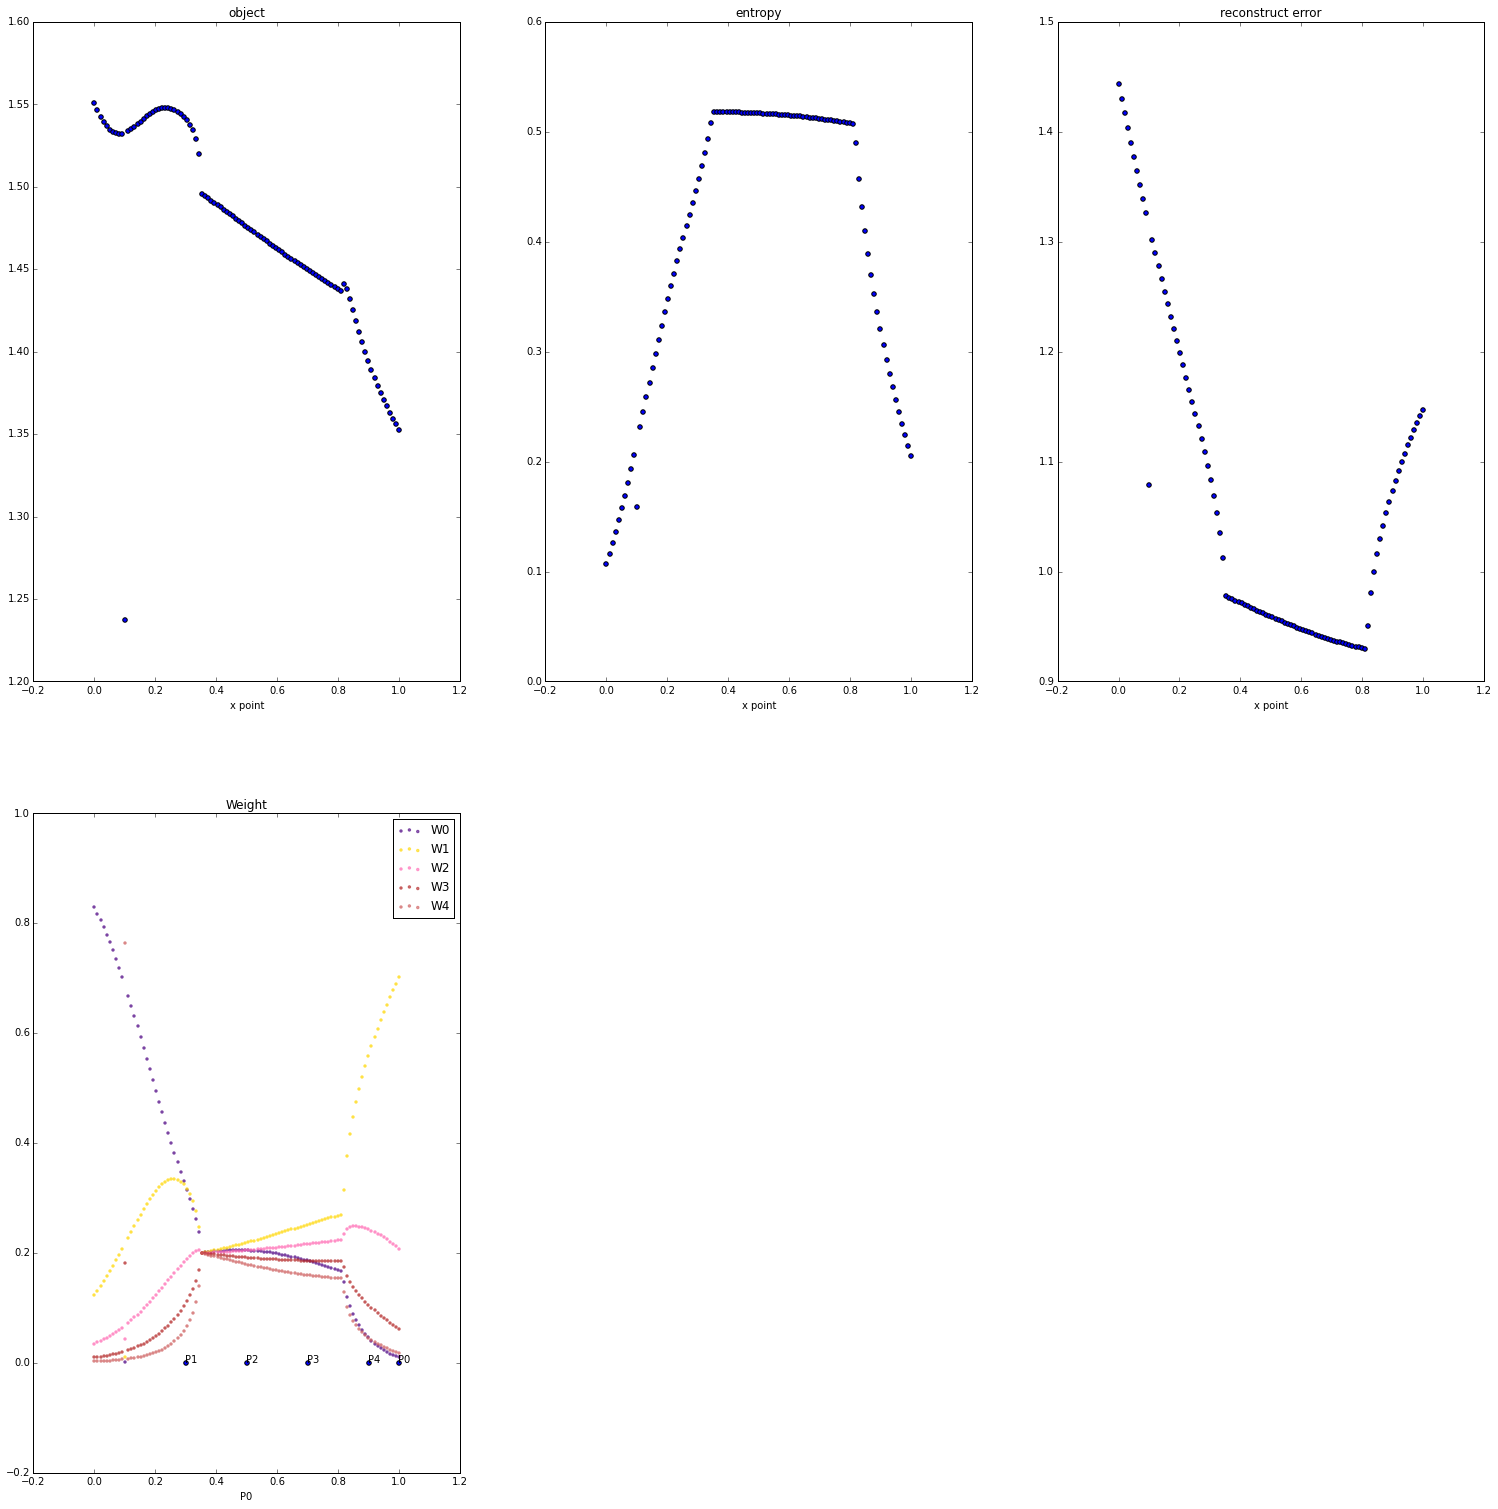

In [84]:
plt.subplot(231)
plt.scatter(X, r[:,2]+r[:,1])
plt.xlabel('x point')
plt.title(u"object")
plt.subplot(232)
plt.scatter(X, r[:,1])
plt.title(u"entropy")
plt.xlabel('x point')
plt.subplot(233)
plt.scatter(X, r[:,2])
plt.xlabel('x point')
plt.title(u"reconstruct error")
plt.subplot(234)
s = []
for i in range(0,samples):
    s.append(plt.scatter(X, [W0[temp][i,-1] for temp in range(0,len(W0))],color=colors_[i],alpha=0.6,s=6))

plt.scatter(P,np.zeros(samples),s=20)
for i in range(0,samples):
    plt.text(P[0,i],-0.00, 'P%d'%i )    
plt.legend(s, ('W%d'%temp for temp in range(0,samples)), 'best', numpoints=1)# make legend
plt.xlabel('P0')
plt.title(u"Weight")